Data shape: (45211, 17)
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Accuracy: 0.8893066460245493

Classification Report:
               precision    recal

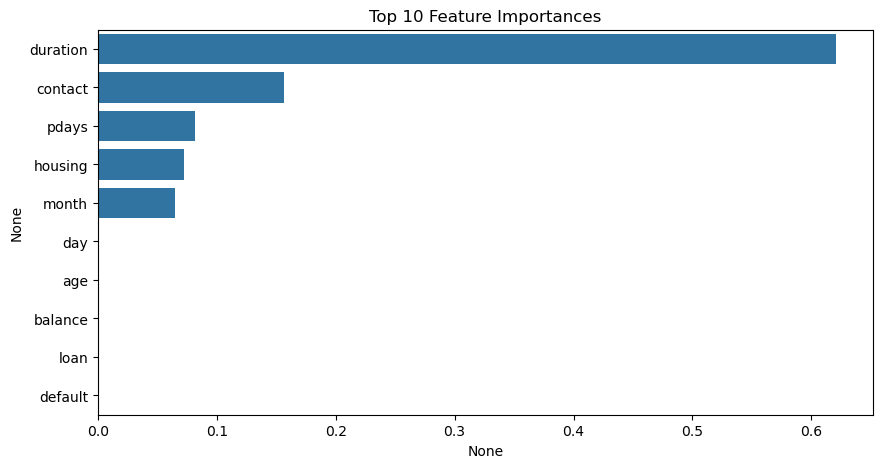

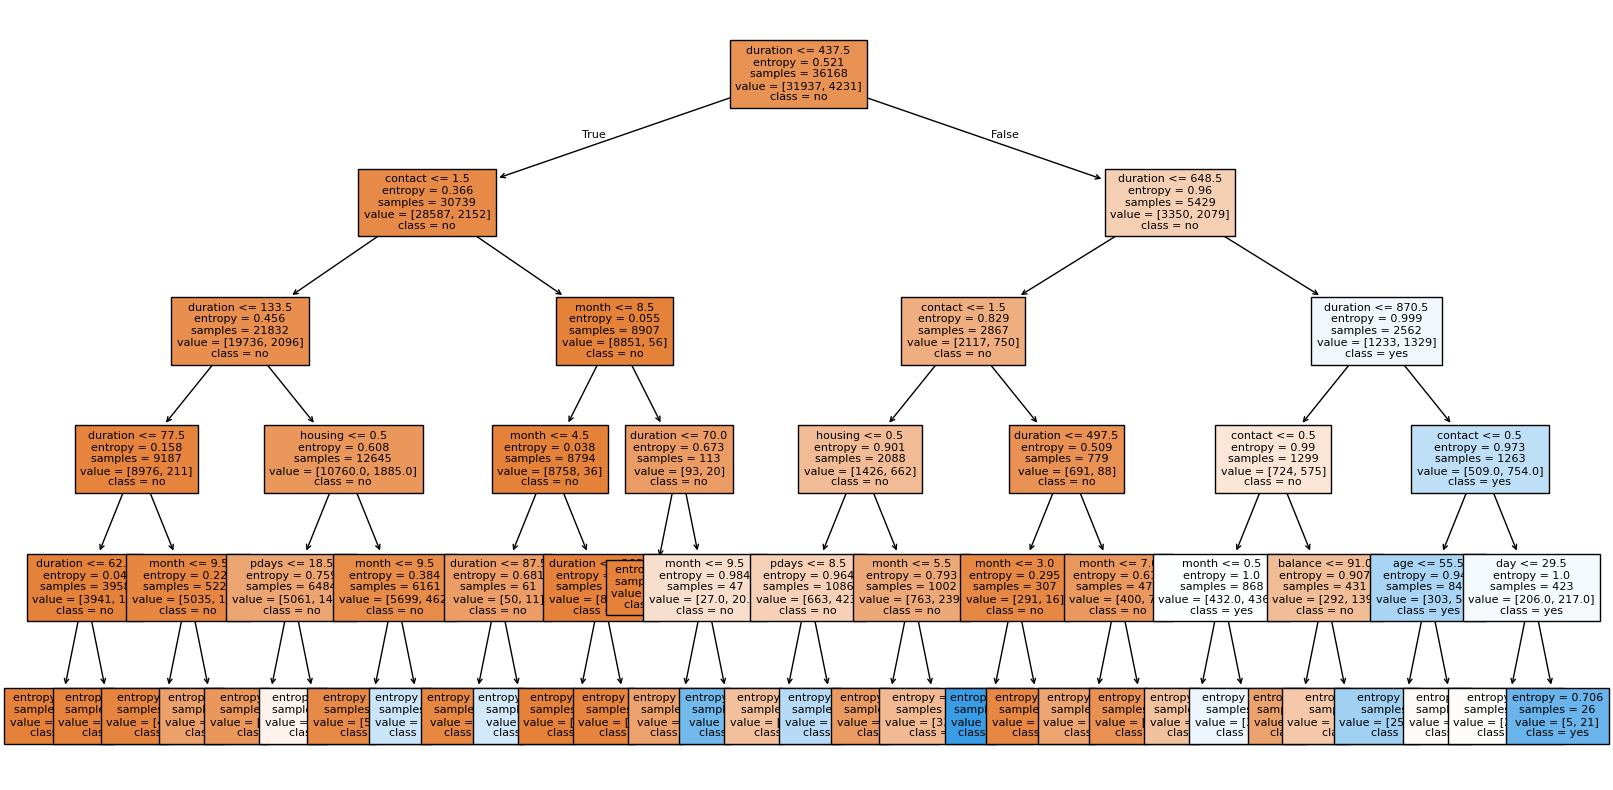

In [2]:
# Decision Tree Classifier for Bank Marketing Dataset
# Requires: pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ===============================
# Load Dataset
# ===============================
df = pd.read_csv("bank-full.csv", sep=";")   # or "bank.csv"
print("Data shape:", df.shape)
print(df.head())

# ===============================
# Preprocessing
# ===============================
# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.columns:
    if df_encoded[col].dtype == "object":
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

# Features and target
X = df_encoded.drop("y", axis=1)
y = df_encoded["y"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================
# Train Decision Tree
# ===============================
clf = DecisionTreeClassifier(
    criterion="entropy", 
    max_depth=5, 
    random_state=42
)
clf.fit(X_train, y_train)

# ===============================
# Evaluation
# ===============================
y_pred = clf.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ===============================
# Feature Importance
# ===============================
feat_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop Features:\n", feat_importance.head(10))

plt.figure(figsize=(10,5))
sns.barplot(x=feat_importance.head(10), y=feat_importance.head(10).index)
plt.title("Top 10 Feature Importances")
plt.show()

# ===============================
# Visualize Decision Tree
# ===============================
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["no", "yes"], filled=True, fontsize=8)
plt.show()